# HR Analytics: Employee Attrition Analysis
This work aims to analyze the factors influencing employee attrition using the HR dataset.

##Introduction

Employee attrition can be costly and disruptive to companies.
Understanding why employees leave is crucial for any organization, as maintaining highly qualified personnel is important for a company's growth and well-being.

My analysis focuses primarily on key variables like gender, education, and marital status to discover patterns related to employee turnover

In [0]:
# Importing libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("/Volumes/workspace/default/hr_volume/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Quick look at data
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Data Cleaning & Prep
* We are checking for missing values
* Mapping numerical education levels to descriptive labels for readability

### ETL Process Summary

The following analysis was structured as an ETL pipeline:

- Extract: 
* Loaded raw HR dataset from Unity Catolog Volume.
- Transform: 
* Checked and cleaned missing or duplicate data.
- Load:
* Cleaned and transformed dataset was used for further analysis and visualization




In [0]:

# Checking for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Dropping duplicates if any
df = df.drop_duplicates()

# Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Mapping education levels to names, assign back to a new column
edu_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
df['educationlevel'] = df['education'].map(edu_map)

# Displaying sample data with mapped education
df[['education', 'educationlevel']].head()


Number of duplicate rows: 0


,education,educationlevel
0,2,College
1,1,Below College
2,2,College
3,4,Master
4,1,Below College


## Exploratory Data Analysis
### Attrition Distribution

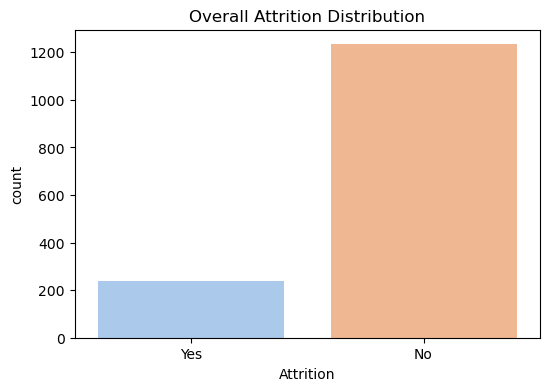

In [0]:
# Attrition count plot
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, hue='Attrition', palette='pastel', legend=False)
plt.title('Overall Attrition Distribution')
plt.show()

### Attrition by Gender

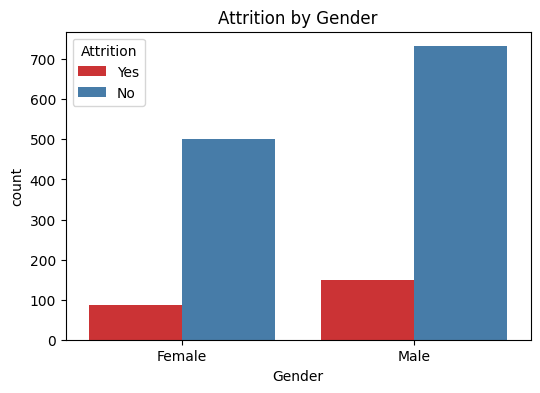

In [0]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='Set1')
plt.title('Attrition by Gender')
plt.show()

### Attrition by Education Level

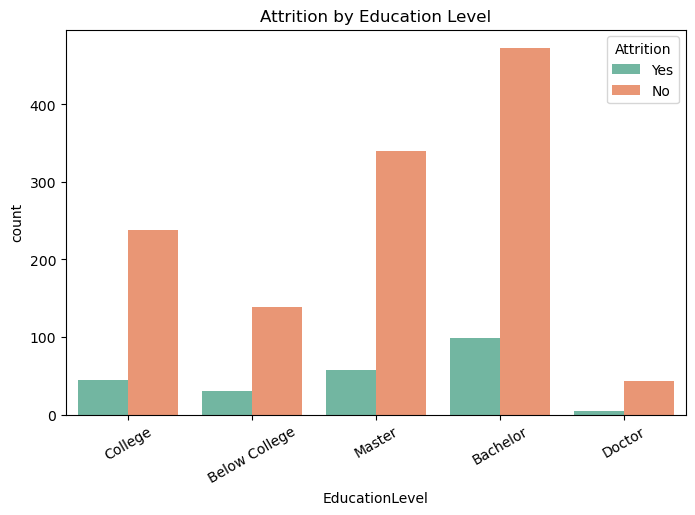

In [0]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='EducationLevel', hue='Attrition', palette='Set2')
plt.title('Attrition by Education Level')
plt.xticks(rotation=30)
plt.show()

### Attrition by Marital Status

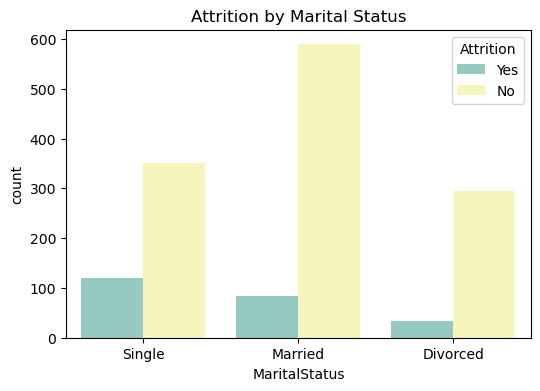

In [0]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='Set3')
plt.title('Attrition by Marital Status')
plt.show()

## Key insights
- Employees with a Doctorate degree have the lowest attrition rate.
- Those with a Bachelor’s degree have the highest number of leavers.
- Single employees are the most likely to leave, while married employees tend to stay longer.

### Attrition by overtime

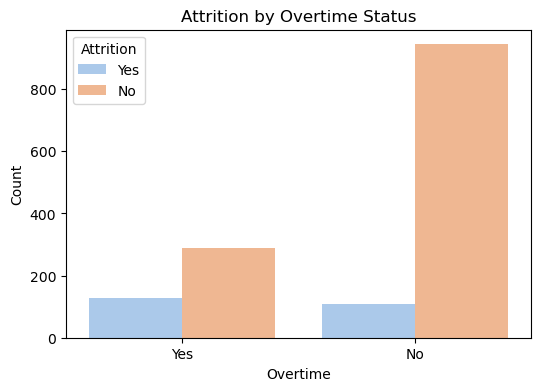

In [0]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='pastel')
plt.title('Attrition by Overtime Status')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.show()

### Monthly income and attrition

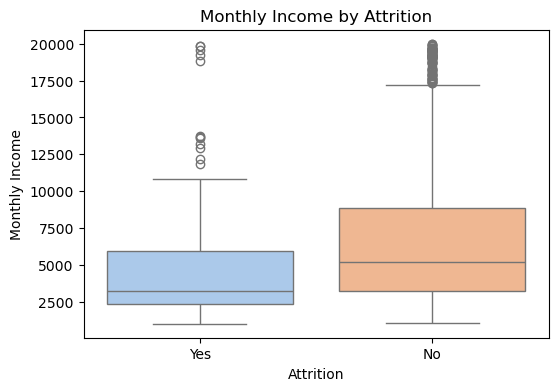

In [0]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', hue='Attrition', palette='pastel', legend=False)
plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

### Job satisfaction and attrition

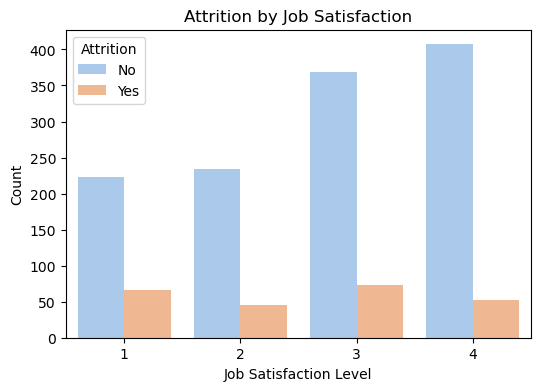

In [0]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='pastel')
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.show()

## Correlation analysis

                          attrition_num
attrition_num                  1.000000
distancefromhome               0.077924
numcompaniesworked             0.043494
monthlyrate                    0.015170
performancerating              0.002889
hourlyrate                    -0.006846
employeenumber                -0.010577
percentsalaryhike             -0.013478
education                     -0.031373
yearssincelastpromotion       -0.033019
relationshipsatisfaction      -0.045872
dailyrate                     -0.056652
trainingtimeslastyear         -0.059478
worklifebalance               -0.063939
environmentsatisfaction       -0.103369
jobsatisfaction               -0.103481
jobinvolvement                -0.130016
yearsatcompany                -0.134392
stockoptionlevel              -0.137145
yearswithcurrmanager          -0.156199
age                           -0.159205
monthlyincome                 -0.159840
yearsincurrentrole            -0.160545
joblevel                      -0.169105


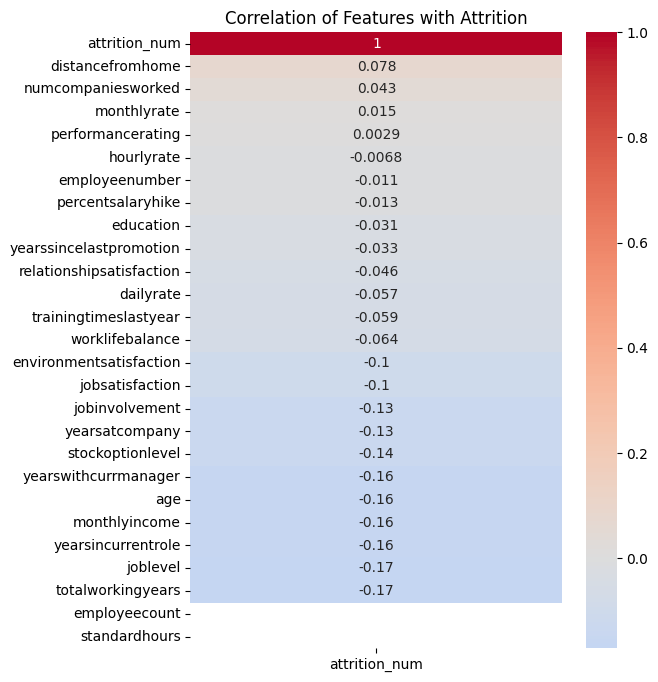

In [0]:
import numpy as np

# encoding 'Attrition' as numeric (Yes=1, No=0) for correlation
df['attrition_num'] = df['attrition'].map({'Yes':1, 'No':0})

# Selecting numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Computing correlation matrix for numeric columns
correlation_matrix = df[numeric_cols].corr()

# Correlation with target variable only
attrition_corr = correlation_matrix[['attrition_num']].sort_values(by='attrition_num', ascending=False)

print(attrition_corr)

# Plotting correlation of features with Attrition only
plt.figure(figsize=(6,8))
sns.heatmap(attrition_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Features with Attrition')
plt.show()


## Summary dashboard

Dataset shape: (1470, 37)

Missing values by column:
age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany   

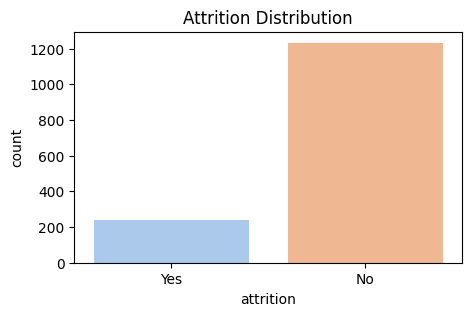

count,mean,std,min,25%,50%,75%,max
1470.0,36.923809523809524,9.135373489136732,18.0,30.0,36.0,43.0,60.0
1470.0,802.4857142857143,403.50909994352816,102.0,465.0,802.0,1157.0,1499.0
1470.0,9.19251700680272,8.106864435666074,1.0,2.0,7.0,14.0,29.0
1470.0,2.912925170068027,1.0241649445978729,1.0,2.0,3.0,4.0,5.0
1470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1470.0,1024.865306122449,602.0243348474751,1.0,491.25,1020.5,1555.75,2068.0
1470.0,2.721768707482993,1.0930822146350005,1.0,2.0,3.0,4.0,4.0
1470.0,65.89115646258503,20.329427593996165,30.0,48.0,66.0,83.75,100.0
1470.0,2.7299319727891156,0.7115611429632304,1.0,2.0,3.0,3.0,4.0
1470.0,2.0639455782312925,1.106939898935122,1.0,1.0,2.0,3.0,5.0



Value counts for gender:
Male      882
Female    588
Name: gender, dtype: int64


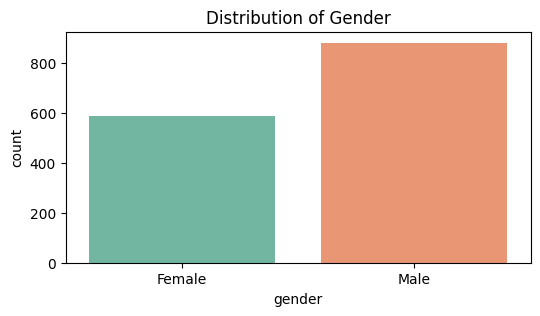


Value counts for educationlevel:
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: educationlevel, dtype: int64


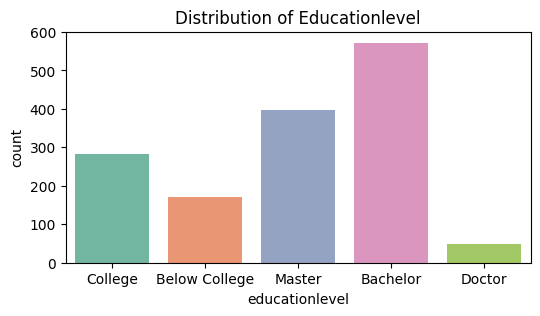


Value counts for maritalstatus:
Married     673
Single      470
Divorced    327
Name: maritalstatus, dtype: int64


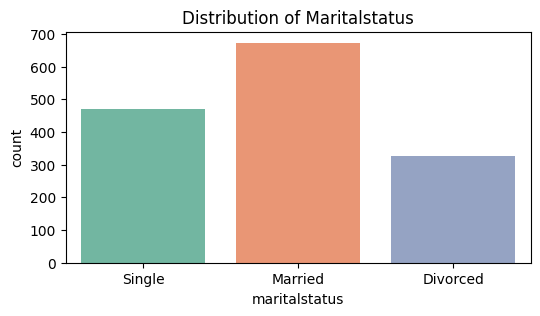


Value counts for overtime:
No     1054
Yes     416
Name: overtime, dtype: int64


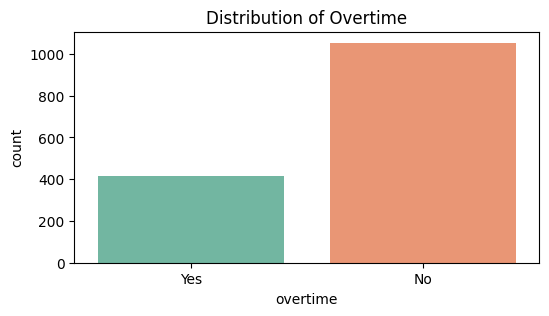

In [0]:
# Basic dataset info
print(f"Dataset shape: {df.shape}")
print("\nMissing values by column:")
print(df.isnull().sum())

# Target variable distribution
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='attrition', palette='pastel')
plt.title('Attrition Distribution')
plt.show()

# Numeric summary stats
display(df.describe().T)

# Categorical counts for key features
for col in ['gender', 'educationlevel', 'maritalstatus', 'overtime']:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.show()
